# CaliHousing

In [ ]:
from sklearn.datasets import fetch_california_housing

# Load the dataset
data = fetch_california_housing()

# Features and target
X = data.data
y = data.target

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 no

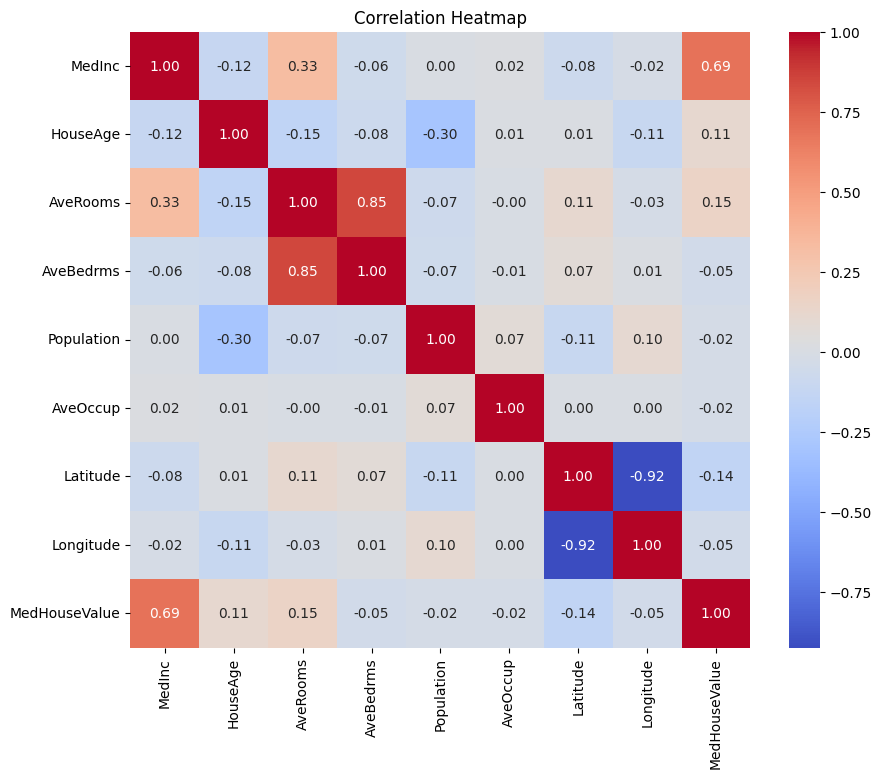

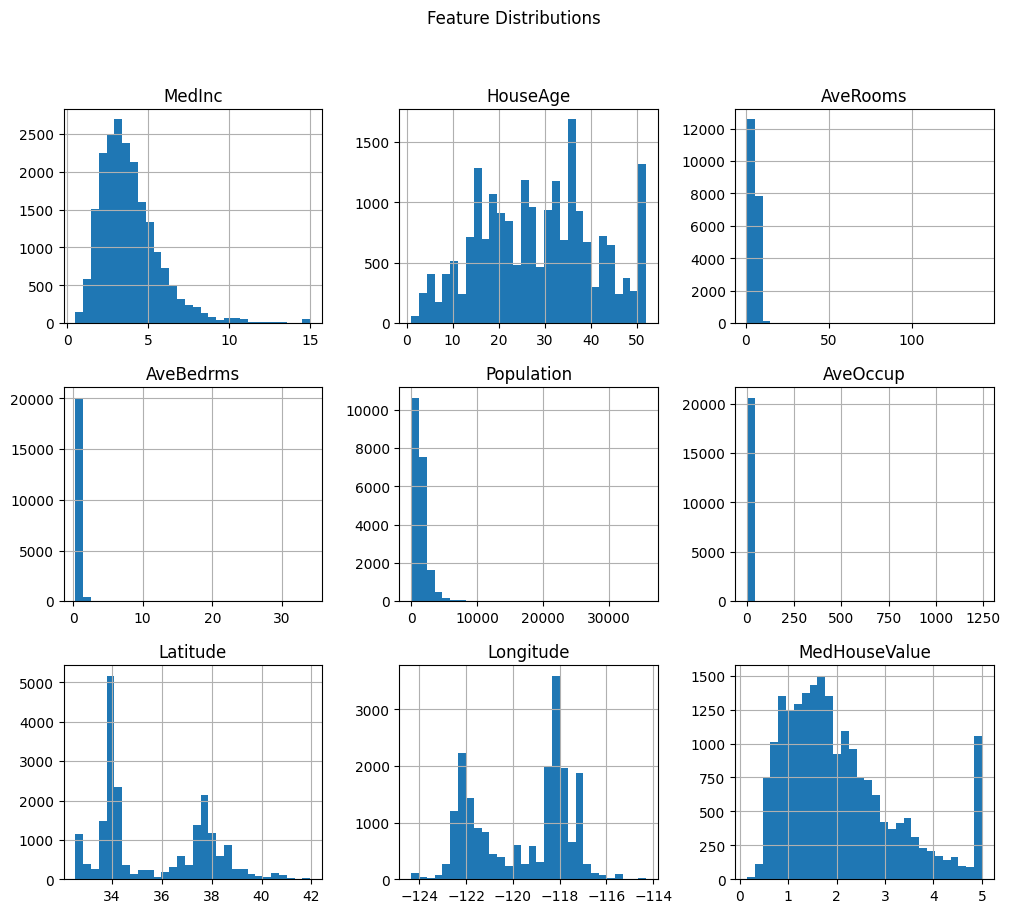

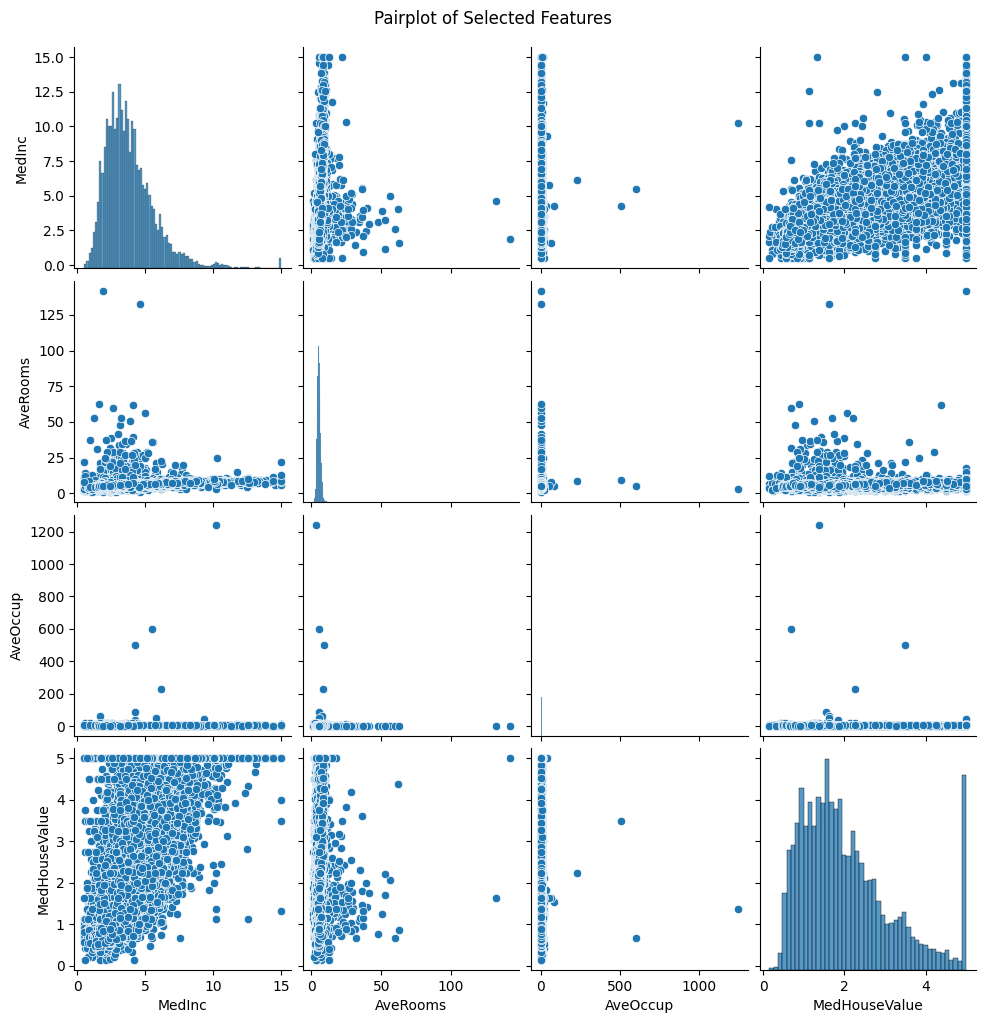

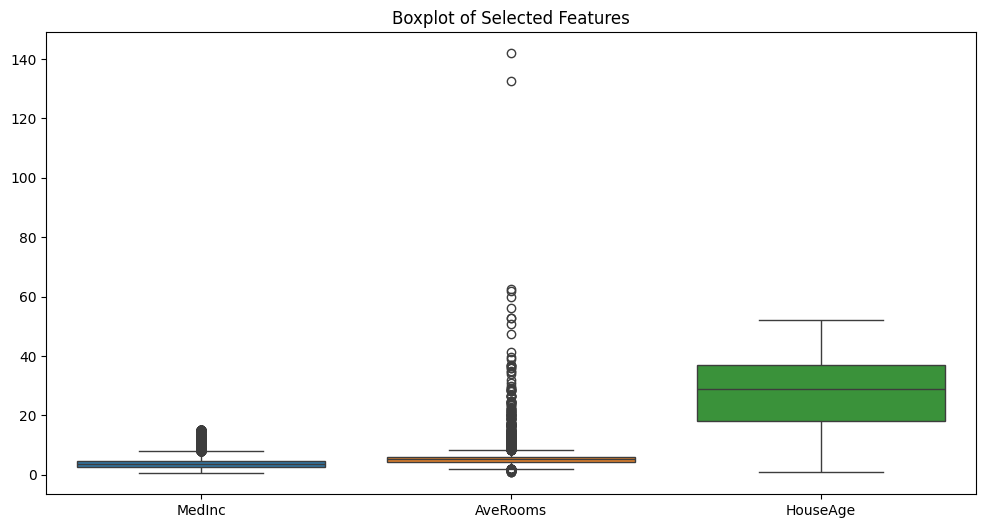

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseValue'] = data.target

# 1. Quick overview
print(df.head())
print("\nInfo:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

# 2. Check for null values
print("\nMissing values:")
print(df.isnull().sum())

# 3. Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 4. Histograms
df.hist(bins=30, figsize=(12, 10))
plt.suptitle("Feature Distributions")
plt.show()

# 5. Pairplot for a few features
sns.pairplot(df[['MedInc', 'AveRooms', 'AveOccup', 'MedHouseValue']])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# 6. Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['MedInc', 'AveRooms', 'HouseAge']])
plt.title("Boxplot of Selected Features")
plt.show()

## Clean data

In [5]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseValue'] = data.target

# Separate features and target
X = df.drop('MedHouseValue', axis=1)
y = df['MedHouseValue']

# Fit Isolation Forest
iso = IsolationForest(contamination=0.02, random_state=42)
outlier_pred = iso.fit_predict(X)

# Mark outliers: -1 = outlier, 1 = inlier
df['outlier'] = outlier_pred

# Filter out outliers
df_clean = df[df['outlier'] == 1].drop('outlier', axis=1)

print(f"Original data shape: {df.shape}")
print(f"After outlier removal: {df_clean.shape}")

Original data shape: (20640, 10)
After outlier removal: (20227, 9)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load the California housing dataset
df = df_clean

# Features and target
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.5558915986952423
R^2 Score: 0.5757877060324523


In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Load dataset
data = fetch_california_housing(as_frame=True)
df = data.frame
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        "Model": name,
        "Mean Squared Error": mse,
        "R^2 Score": r2
    })

# Create DataFrame
# Create DataFrame
results_df = pd.DataFrame(results).sort_values(by="R^2 Score", ascending=False)
print(results_df)

               Model  Mean Squared Error  R^2 Score
4      Random Forest            0.255726   0.804850
5  Gradient Boosting            0.293997   0.775645
3      Decision Tree            0.499707   0.618663
1   Ridge Regression            0.555803   0.575855
0  Linear Regression            0.555892   0.575788
2   Lasso Regression            0.938034   0.284167


Model Performance:
                     Model  Mean Squared Error  R^2 Score
6  Hist Gradient Boosting            0.215505   0.835544
7        Boosted Ensemble            0.240679   0.816333
4           Random Forest            0.255726   0.804850
5       Gradient Boosting            0.293997   0.775645
3           Decision Tree            0.499707   0.618663
1        Ridge Regression            0.555803   0.575855
0       Linear Regression            0.555892   0.575788
2        Lasso Regression            0.938034   0.284167


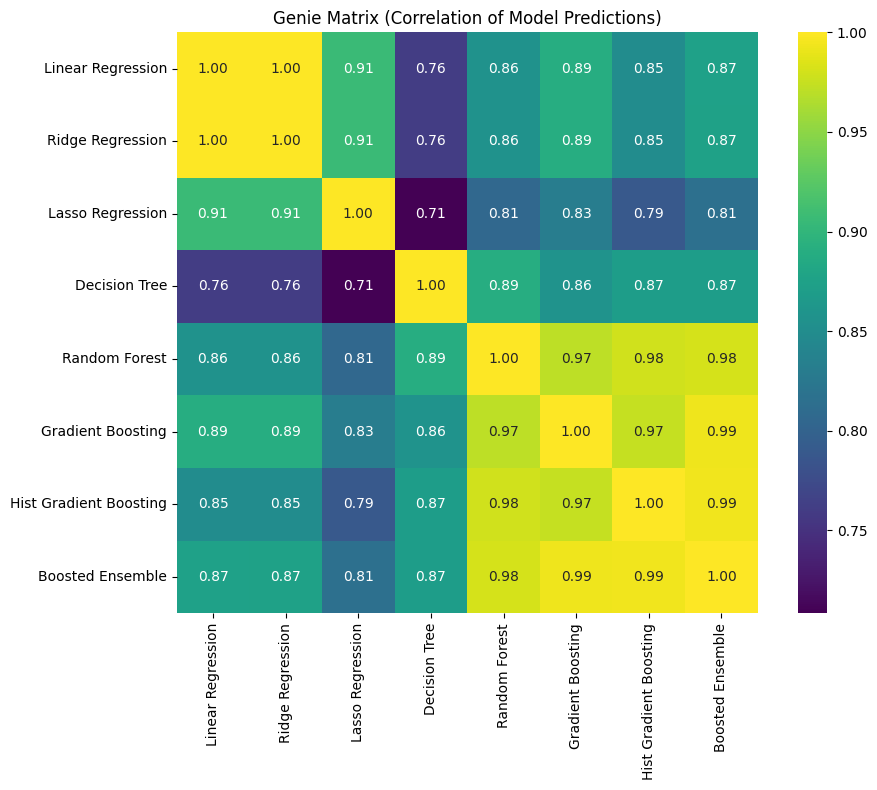

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, 
    GradientBoostingRegressor, 
    HistGradientBoostingRegressor, 
    VotingRegressor
)
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = fetch_california_housing(as_frame=True)
df = data.frame
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Hist Gradient Boosting": HistGradientBoostingRegressor(random_state=42),
}

# Add ensemble model using boosted trees
boosted_ensemble = VotingRegressor(estimators=[
    ("gbr", GradientBoostingRegressor(random_state=42)),
    ("hgb", HistGradientBoostingRegressor(random_state=42)),
])
models["Boosted Ensemble"] = boosted_ensemble

# Train and evaluate models
results = []
preds = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    preds[name] = y_pred
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        "Model": name,
        "Mean Squared Error": mse,
        "R^2 Score": r2
    })

# Create results DataFrame
results_df = pd.DataFrame(results).sort_values(by="R^2 Score", ascending=False)
print("Model Performance:\n", results_df)

# Genie Matrix (correlation of predictions)
preds_df = pd.DataFrame(preds)
correlation_matrix = preds_df.corr()

# Plot Genie Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", square=True)
plt.title("Genie Matrix (Correlation of Model Predictions)")
plt.tight_layout()
plt.show()